In [70]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
conn = sqlite3.connect('/home/supernauth/Dokumentumok/kod/cubix/cubix_hazi/07/quiz/quiz/db.sqlite3')
cursor = conn.cursor()
cursor.execute("SELECT * FROM quiz_app_user")
rows = cursor.fetchall()
cursor.close()
conn.close()

users = pd.DataFrame(rows)
users.columns = ['id', 'username']

In [72]:
conn = sqlite3.connect('/home/supernauth/Dokumentumok/kod/cubix/cubix_hazi/07/quiz/quiz/db.sqlite3')
cursor = conn.cursor()
cursor.execute("SELECT * FROM quiz_app_useranswer")
rows = cursor.fetchall()
cursor.close()
conn.close()

answers = pd.DataFrame(rows)
answers.columns = ['id', 'is_correct', 'question_id', 'user_id', 'chosen_option']

In [73]:
users.head()

,id,username
0,47,James10
1,48,John56
2,49,Robert88
3,50,Michael33
4,51,William77


In [74]:
answers.head()

,id,is_correct,question_id,user_id,chosen_option
0,69,1,1,1,B
1,70,1,2,1,D
2,71,1,3,1,C
3,72,1,4,1,A
4,73,1,5,1,C


In [75]:
user_data = {}

for index, row in answers.iterrows():
    user_id = row['user_id']
    question_id = row['question_id']
    is_correct = row['is_correct']
    
    if user_id not in user_data:
        user_data[user_id] = {}
    
    user_data[user_id][f'question_{question_id}'] = is_correct

In [76]:
user_data[1]

{'question_1': 1,
 'question_2': 1,
 'question_3': 1,
 'question_4': 1,
 'question_5': 1,
 'question_6': 1,
 'question_7': 0,
 'question_8': 1}

In [77]:
question_data = {}

for index, row in answers.iterrows():
    question_id = row['question_id']
    is_correct = row['is_correct']
    chosen_option = row['chosen_option']
    

    if question_id not in question_data:
        question_data[question_id] = []
    question_data[question_id].append(is_correct)

In [78]:
question_data[1]
well_answered = []

for i in range(1, 9):
    well_answered.append((question_data[i]).count(1))

In [79]:
well_answered_percentage = [round(i / 120 * 100, 2) for i in well_answered]

In [80]:
well_answered_percentage

[77.5, 68.33, 78.33, 62.5, 67.5, 63.33, 71.67, 70.0]

Text(0, 0.5, 'Percentage')

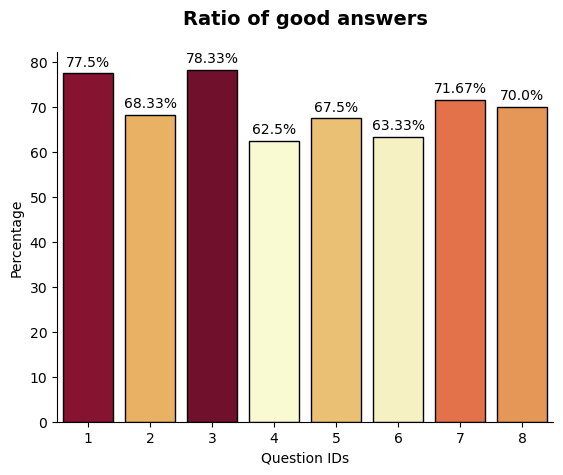

In [81]:
ax = sns.barplot(
    x=range(1, 9),
    y=well_answered_percentage,
    hue=well_answered_percentage,
    palette="YlOrRd",
    edgecolor="black",
    legend=False
    )

for i, percentage in enumerate(well_answered_percentage):
    ax.text(i, percentage + 1, f"{percentage}%", ha='center', va='bottom')
    
ax.set_title(
    "Ratio of good answers", 
    fontsize=14, 
    fontweight='bold', 
    pad=20
    )


ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel("Question IDs")
ax.set_ylabel("Percentage")

In [82]:
result = answers.groupby(['question_id', 'chosen_option'], as_index=True)[['question_id', 'chosen_option']]

In [83]:
result.head()

,question_id,chosen_option
0,1,B
1,2,D
2,3,C
3,4,A
4,5,C
...,...,...
693,6,C
695,8,D
700,5,D
703,8,D


In [84]:
pivot = pd.pivot_table(answers, values='id', index='question_id', columns='chosen_option', aggfunc='count', fill_value=0)


In [85]:
pivot

chosen_option,A,B,C,D
question_id,,,,
1,8,93,8,11
2,13,12,13,82
3,10,7,94,9
4,75,13,15,17
5,12,14,81,13
6,16,11,17,76
7,15,86,4,15
8,12,84,13,11


In [86]:
options = ['A', 'B', 'C', 'D']

In [87]:
id1 = answers[['chosen_option']][answers['question_id'] == 1]

In [88]:
occurences = id1.value_counts()

In [89]:
occurences

chosen_option
B                93
D                11
A                 8
C                 8
dtype: int64

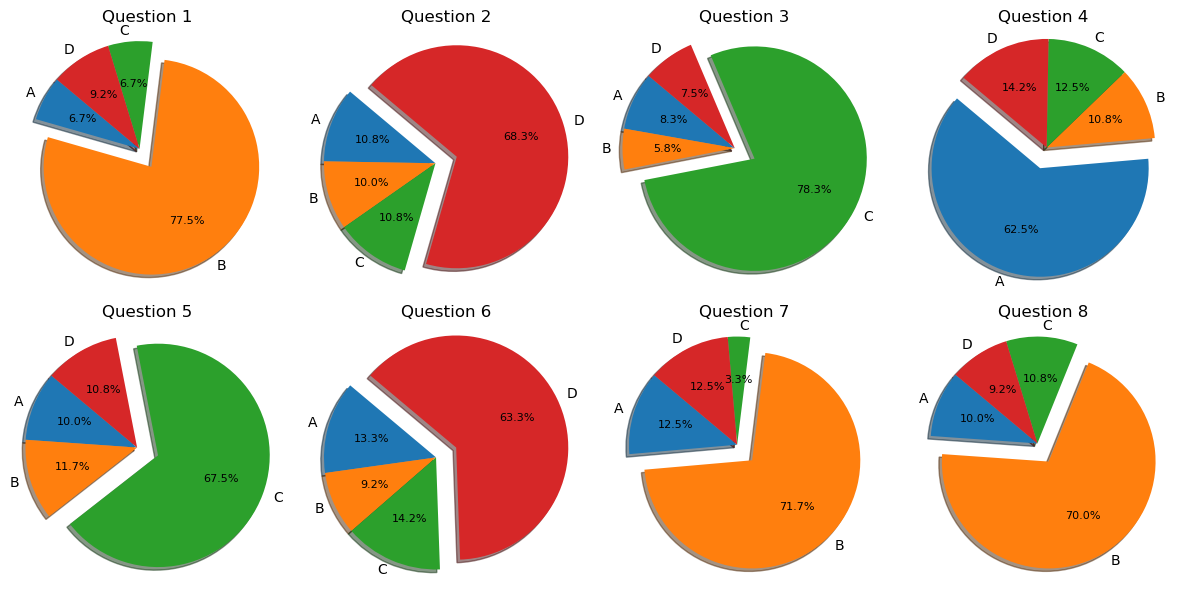

In [93]:
# Create a 2x4 subplot grid
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the subplot grid for easier iteration
axs = axs.flatten()

# Plotting
for i, (index, row) in enumerate(pivot.iterrows()):
    explode = [0.2 if idx == row.index.get_loc(exploded_options[index]) else 0 for idx in range(len(row))]
    
    # Plot pie chart
    patches, texts, autotexts = axs[i].pie(row, labels=row.index, autopct=lambda p: f'{p:.1f}%', startangle=140, explode=explode, colors=colors, shadow=True)
    
    # Enhancements
    axs[i].set_title(f'Question {index}', fontsize=12)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    for autotext in autotexts:
        autotext.set_fontsize(8)  # Adjust font size of percentage labels

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

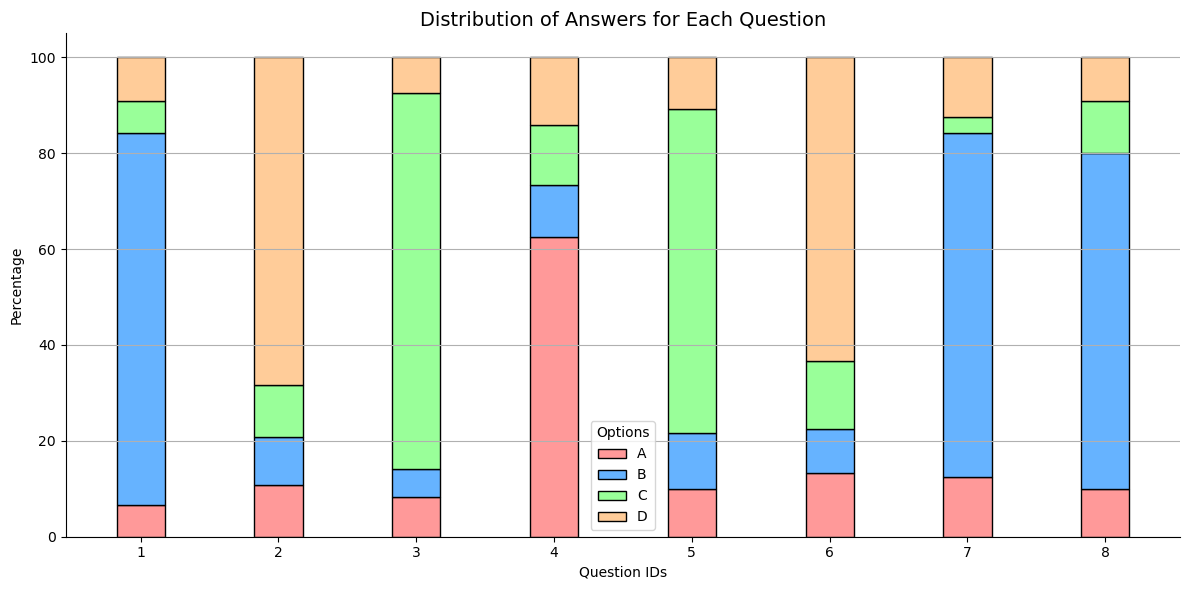

In [107]:
import matplotlib.pyplot as plt

# Data
question_ids = pivot.index
options = pivot.columns
num_questions = len(question_ids)

# Calculate percentages
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(num_questions)

# Tastier colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Red, Blue, Green, Orange

bottom = np.zeros(num_questions)  # Initialize the bottom positions for each bar

for i, option in enumerate(options):
    ax.bar(index, pivot_percent[option], bar_width, label=option, color=colors[i], bottom=bottom, edgecolor='black')
    bottom += pivot_percent[option]  # Update the bottom positions for the next bar

# Hide the top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Enhancements
ax.set_title('Distribution of Answers for Each Question', fontsize=14)
ax.set_xlabel('Question IDs')
ax.set_ylabel('Percentage')
ax.set_xticks(index)
ax.set_xticklabels(question_ids)
ax.legend(title='Options')
ax.grid(axis='y')

plt.tight_layout()
plt.show()
